# The Dataset description
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

# Research Questions
**Times of India article dated Jan 18, 2019 states that `“After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.”` Test this claim with the data given to you.** 2. Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv('aspiring_minds_employability_outcomes_2015.csv')
df

Unnamed: 0      ID     Salary               DOJ               DOL  \
0         train  203097   420000.0  01-06-2012 00:00           present   
1         train  579905   500000.0  01-09-2013 00:00           present   
2         train  810601   325000.0  01-06-2014 00:00           present   
3         train  267447  1100000.0  01-07-2011 00:00           present   
4         train  343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   
...         ...     ...        ...               ...               ...   
3993      train   47916   280000.0  01-10-2011 00:00  01-10-2012 00:00   
3994      train  752781   100000.0  01-07-2013 00:00  01-07-2013 00:00   
3995      train  355888   320000.0  01-07-2013 00:00           present   
3996      train  947111   200000.0  01-07-2014 00:00  01-01-2015 00:00   
3997      train  324966   400000.0  01-02-2013 00:00           present   

                      Designation           JobCity Gender               DOB  \
0         senior quality engineer         Bangalore      f  19-02-1990 00:00   
1               assistant manager            Indore      m  04-10-1989 00:00   
2                systems engineer           Chennai      f  03-08-1992 00:00   
3        senior software engineer           Gurgaon      m  05-12-1989 00:00   
4                             get           Manesar      m  27-02-1991 00:00   
...                           ...               ...    ...               ...   
3993            software engineer        New Delhi       m  15-04-1987 00:00   
3994             technical writer         Hyderabad      f  27-08-1992 00:00   
3995  associate software engineer         Bangalore      m  03-07-1991 00:00   
3996           software developer  Asifabadbanglore      f  20-03-1992 00:00   
3997      senior systems engineer           Chennai      f  26-02-1991 00:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980           

In [48]:
df.shape


(3998, 39)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [50]:
df.isnull()

Unnamed: 0     ID  Salary    DOJ    DOL  Designation  JobCity  Gender  \
0          False  False   False  False  False        False    False   False   
1          False  False   False  False  False        False    False   False   
2          False  False   False  False  False        False    False   False   
3          False  False   False  False  False        False    False   False   
4          False  False   False  False  False        False    False   False   
...          ...    ...     ...    ...    ...          ...      ...     ...   
3993       False  False   False  False  False        False    False   False   
3994       False  False   False  False  False        False    False   False   
3995       False  False   False  False  False        False    False   False   
3996       False  False   False  False  False        False    False   False   
3997       False  False   False  False  False        False    False   False   

        DOB  10percentage  ...  ComputerScience  MechanicalEngg  \
0     False         False  ...            False           False   
1     False         False  ...            False           False   
2     False         False  ...            False           False   
3     False         False  ...            False           False   
4     False         False  ...            False           False   
...     ...           ...  ...              ...             ...   
3993  False         False  ...            False           False   
3994  False         False  ...            False           False   
3995  False         False  ...            False           False   
3996  False         False  ...            False           False   
3997  False         False  ...            False           False   

      ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              False        False      False              False   
1              False        False      False              False   
2              False        False      False              False   
3              False        False      False              False   
4              False        False      False              False   
...              ...          ...        ...                ...   
3993           False        False      False              False   
3994           False        False      False              False   
3995           False        False      False              False   
3996           False        False      False              False   
3997           False        False      False              False   

      agreeableness  extraversion  nueroticism  openess_to_experience  
0             False         False        False                  False  
1             False         False        False                  False  
2             False         False        False                  False  
3             False         False        False                  False  
4             False         False        False                  False  
...             ...           ...          ...                    ...  
3993          False         False        False                  False  
3994          False         False        False                  False  
3995          False         False        False                  False  
3996          False         False        False                  False  
3997          False         False        False                  False  

[3998 rows x 39 columns]

In [51]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [52]:
df.head()

Unnamed: 0      ID     Salary               DOJ               DOL  \
0      train  203097   420000.0  01-06-2012 00:00           present   
1      train  579905   500000.0  01-09-2013 00:00           present   
2      train  810601   325000.0  01-06-2014 00:00           present   
3      train  267447  1100000.0  01-07-2011 00:00           present   
4      train  343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f  19-02-1990 00:00          84.3   
1         assistant manager     Indore      m  04-10-1989 00:00          85.4   
2          systems engineer    Chennai      f  03-08-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  05-12-1989 00:00          85.6   
4                       get    Manesar      m  27-02-1991 00:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [53]:
df=df.set_index('ID')

In [54]:
df.describe().T

count           mean            std         min  \
Salary                 3998.0  307699.849925  212737.499957  35000.0000   
10percentage           3998.0      77.925443       9.850162     43.0000   
12graduation           3998.0    2008.087544       1.653599   1995.0000   
12percentage           3998.0      74.466366      10.999933     40.0000   
CollegeID              3998.0    5156.851426    4802.261482      2.0000   
CollegeTier            3998.0       1.925713       0.262270      1.0000   
collegeGPA             3998.0      71.486171       8.167338      6.4500   
CollegeCityID          3998.0    5156.851426    4802.261482      2.0000   
CollegeCityTier        3998.0       0.300400       0.458489      0.0000   
GraduationYear         3998.0    2012.105803      31.857271      0.0000   
English                3998.0     501.649075     104.940021    180.0000   
Logical                3998.0     501.598799      86.783297    195.0000   
Quant                  3998.0     513.378189     122.302332    120.0000   
Domain                 3998.0       0.510490       0.468671     -1.0000   
ComputerProgramming    3998.0     353.102801     205.355519     -1.0000   
ElectronicsAndSemicon  3998.0      95.328414     158.241218     -1.0000   
ComputerScience        3998.0      90.742371     175.273083     -1.0000   
MechanicalEngg         3998.0      22.974737      98.123311     -1.0000   
ElectricalEngg         3998.0      16.478739      87.585634     -1.0000   
TelecomEngg            3998.0      31.851176     104.852845     -1.0000   
CivilEngg              3998.0       2.683842      36.658505     -1.0000   
conscientiousness      3998.0      -0.037831       1.028666     -4.1267   
agreeableness          3998.0       0.146496       0.941782     -5.7816   
extraversion           3998.0       0.002763       0.951471     -4.6009   
nueroticism            3998.0      -0.169033       1.007580     -2.6430   
openess_to_experience  3998.0      -0.138110       1.008075     -7.3757   

                                 25%            50%            75%  \
Salary                 180000.000000  300000.000000  370000.000000   
10percentage               71.680000      79.150000      85.670000   
12graduation             2007.000000    2008.000000    2009.000000   
12percentage               66.000000      74.400000      82.600000   
CollegeID                 494.000000    3879.000000    8818.000000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                 66.407500      71.720000      76.327500   
CollegeCityID             494.000000    3879.000000    8818.000000   
CollegeCityTier             0.000000       0.000000       1.000000   
GraduationYear           2012.000000    2013.000000    2014.000000   
English                   425.000000     500.000000     570.000000   
Logical                   445.000000     505.000000     565.000000   
Quant                     430.000000     515.000000     595.000000   
Domain                      0.342315       0.622643       0.842248   
ComputerProgramming       295.000000     415.000000     495.000000   
ElectronicsAndSemicon      -1.000000      -1.000000     233.000000   
ComputerScience            -1.000000      -1.000000      -1.000000   
MechanicalEngg             -1.000000      -1.000000      -1.000000   
ElectricalEngg             -1.000000      -1.000000      -1.000000   
TelecomEngg                -1.000000      -1.000000      -1.000000   
CivilEngg                  -1.000000      -1.000000      -1.000000   
conscientiousness          -0.713525       0.046400       0.702700   
agreeableness              -0.287100       0.212400       0.812800   
extraversion               -0.604800       0.091400       0.672000   
nueroticism                -0.868200      -0.234400       0.526200   
openess_to_experience      -0.669200      -0.094300       0.502400   

                                max  
Salary                 4.000000e+06  
10percentage           9.776000

In [55]:
df.head()

Unnamed: 0     Salary               DOJ               DOL  \
ID                                                                 
203097      train   420000.0  01-06-2012 00:00           present   
579905      train   500000.0  01-09-2013 00:00           present   
810601      train   325000.0  01-06-2014 00:00           present   
267447      train  1100000.0  01-07-2011 00:00           present   
343523      train   200000.0  01-03-2014 00:00  01-03-2015 00:00   

                     Designation    JobCity Gender               DOB  \
ID                                                                     
203097   senior quality engineer  Bangalore      f  19-02-1990 00:00   
579905         assistant manager     Indore      m  04-10-1989 00:00   
810601          systems engineer    Chennai      f  03-08-1992 00:00   
267447  senior software engineer    Gurgaon      m  05-12-1989 00:00   
343523                       get    Manesar      m  27-02-1991 00:00   

        10percentage                         10board  ...  ComputerScience  \
ID                                                    ...                    
203097          84.3  board ofsecondary education,ap  ...               -1   
579905          85.4                            cbse  ...               -1   
810601          85.0                            cbse  ...               -1   
267447          85.6                            cbse  ...               -1   
343523          78.0                            cbse  ...               -1   

        MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
ID                                                              
203097              -1             -1           -1         -1   
579905              -1             -1           -1         -1   
810601              -1             -1           -1         -1   
267447              -1             -1           -1         -1   
343523              -1             -1           -1         -1   

       conscientiousness agreeableness  extraversion  nueroticism  \
ID                                                                  
203097            0.9737        0.8128        0.5269      1.35490   
579905           -0.7335        0.3789        1.2396     -0.10760   
810601            0.2718        1.7109        0.1637     -0.86820   
267447            0.0464        0.3448       -0.3440     -0.40780   
343523           -0.8810       -0.2793       -1.0697      0.09163   

        openess_to_experience  
ID                             
203097                -0.4455  
579905                 0.8637  
810601                 0.6721  
267447                -0.9194  
343523                -0.1295  

[5 rows x 38 columns]

# Univariate Analysis

In [56]:
df['Salary']

ID
203097     420000.0
579905     500000.0
810601     325000.0
267447    1100000.0
343523     200000.0
            ...    
47916      280000.0
752781     100000.0
355888     320000.0
947111     200000.0
324966     400000.0
Name: Salary, Length: 3998, dtype: float64

In [57]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

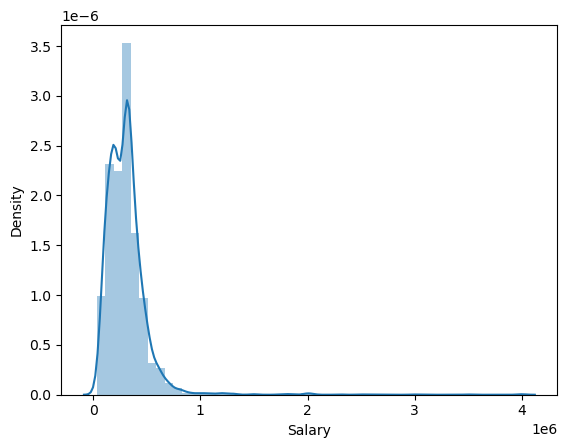

In [58]:
sns.distplot(df['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary'>

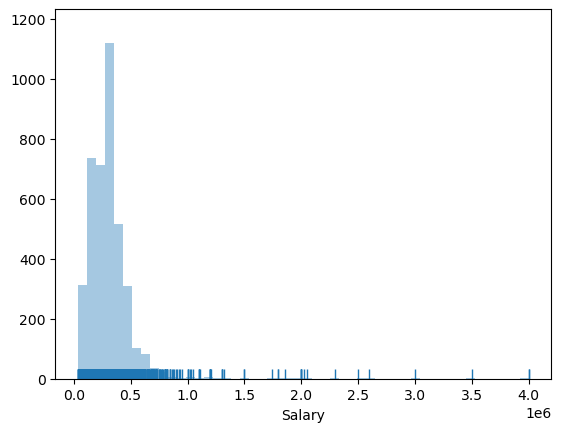

In [59]:
sns.distplot(df['Salary'], kde=False, rug=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

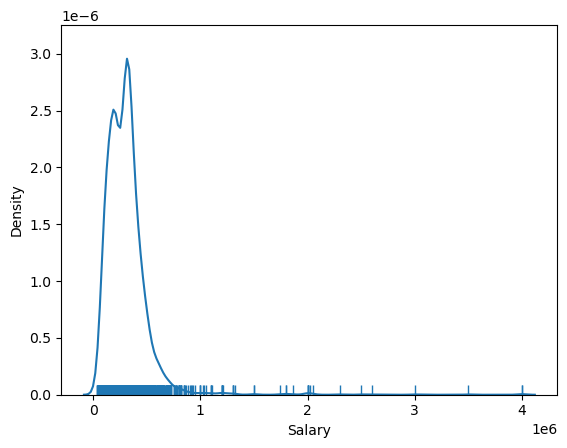

In [60]:
sns.distplot(df['Salary'], hist=False, rug=True)

<AxesSubplot:>

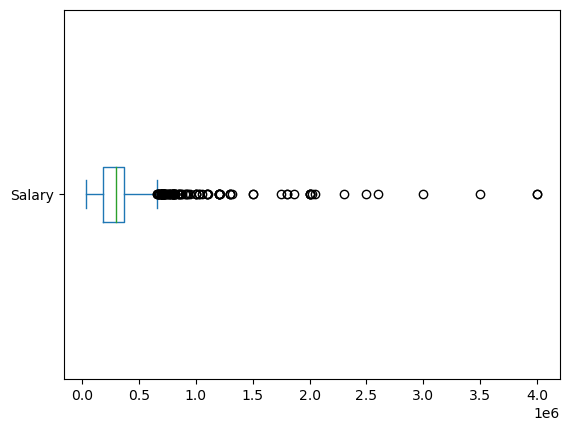

In [61]:
df.Salary.plot(kind='box', vert=False)

# Removing Outliers

Salary > 10,00,000 considered as outliers 

In [62]:
outliers=df[df['Salary']>1000000].index


In [63]:
df.drop(outliers,inplace=True)

In [64]:
df.shape

(3962, 38)

In [65]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [66]:
df.shape

(3962, 37)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

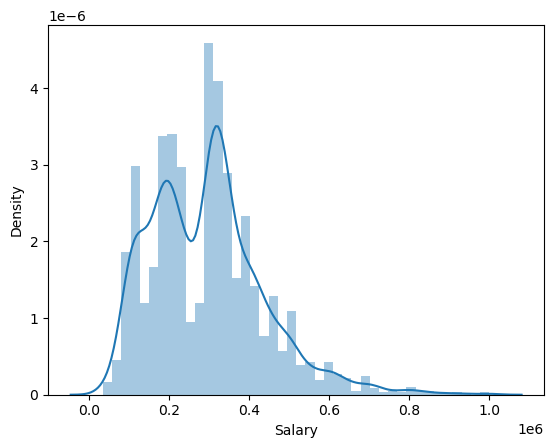

In [67]:
sns.distplot(df['Salary'])

<AxesSubplot:>

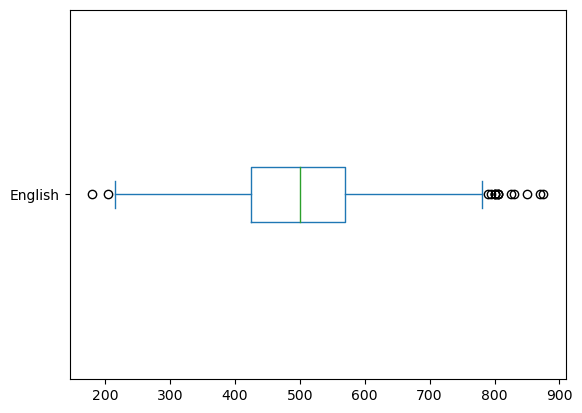

In [68]:
df.English.plot(kind='box', vert=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='English', ylabel='Density'>

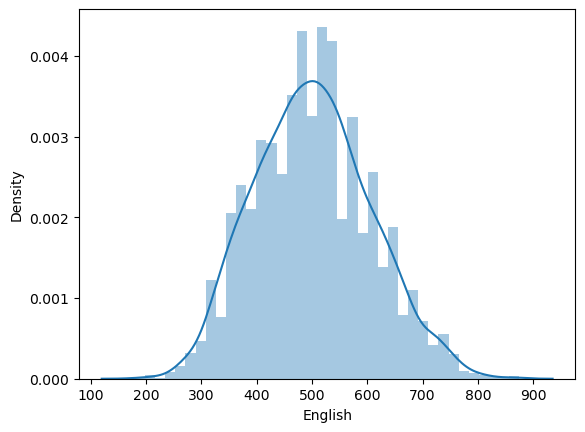

In [69]:
sns.distplot(df['English'])

This column is normally Distributed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Logical', ylabel='Density'>

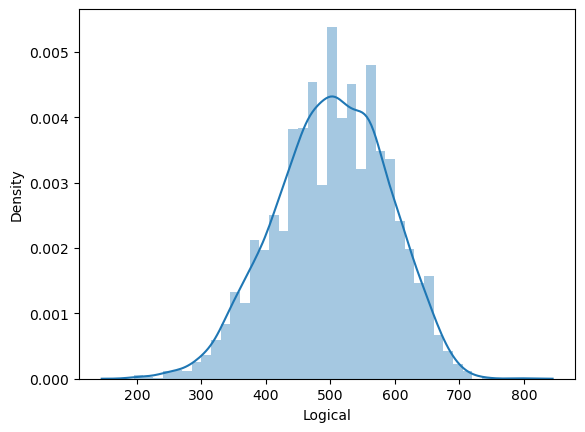

In [70]:
sns.distplot(df['Logical'])

<AxesSubplot:>

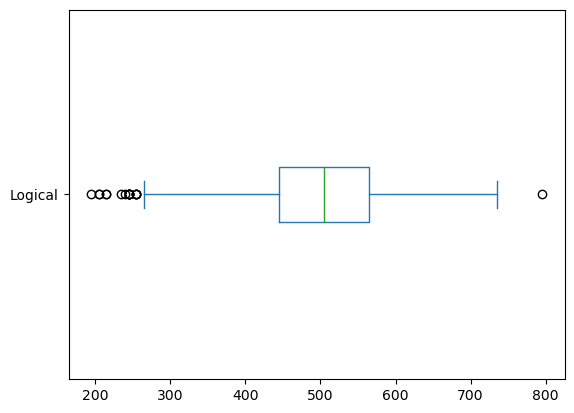

In [71]:
df.Logical.plot(kind='box', vert=False)

This Logical column is normally distributed, no outliers are seen.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quant', ylabel='Density'>

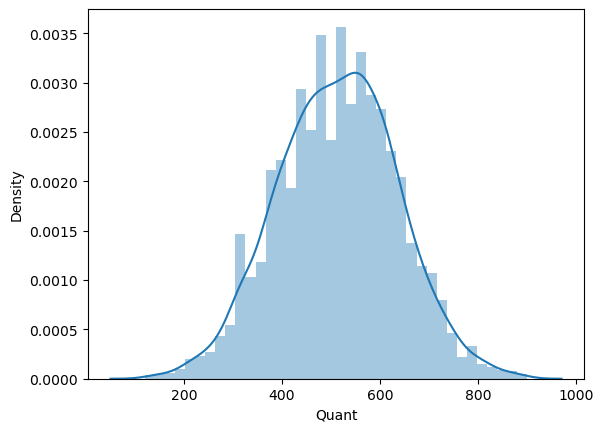

In [72]:
sns.distplot(df["Quant"])

<AxesSubplot:>

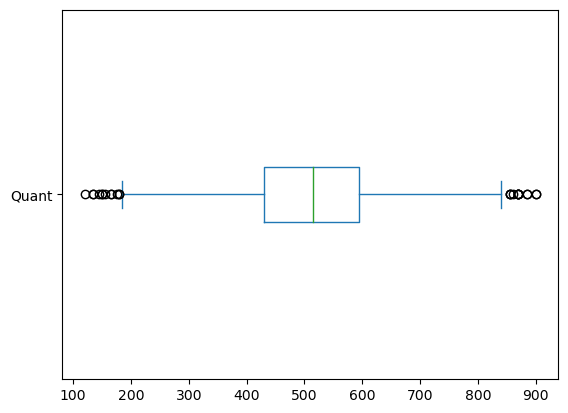

In [73]:
df.Quant.plot(kind='box', vert=False)

In [74]:
df.12percentage.plot(kind='box', vert=False)

SyntaxError: invalid syntax (288089693.py, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12percentage', ylabel='Density'>

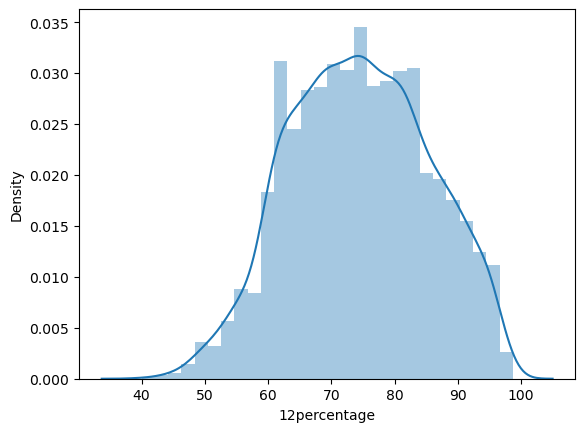

In [75]:
sns.distplot(df["12percentage"])

Outliers are there as 12percentage column is not normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='10percentage', ylabel='Density'>

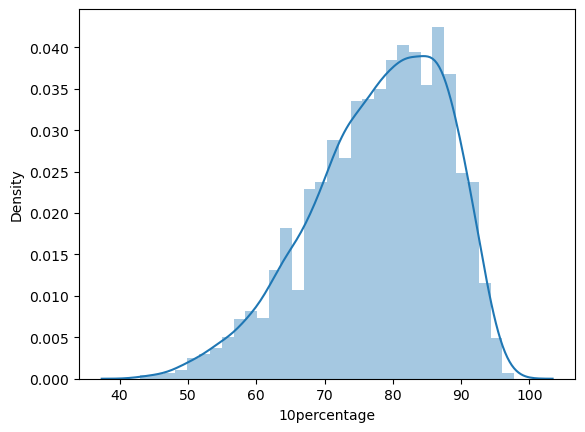

In [76]:
sns.distplot(df["10percentage"])

Outliers are there as 10percentage column is not normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Domain', ylabel='Density'>

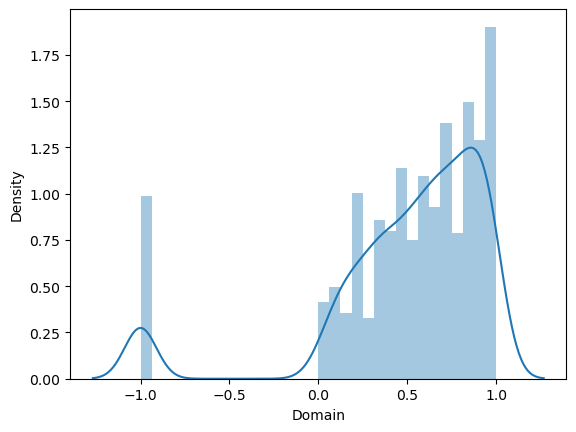

In [77]:
sns.distplot(df["Domain"])

Not normally distributed

# Countplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

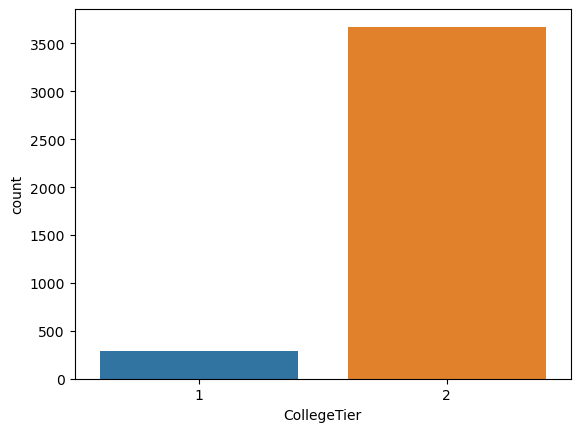

In [78]:
sns.countplot(df.CollegeTier)

Tier 2 college have higher count

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

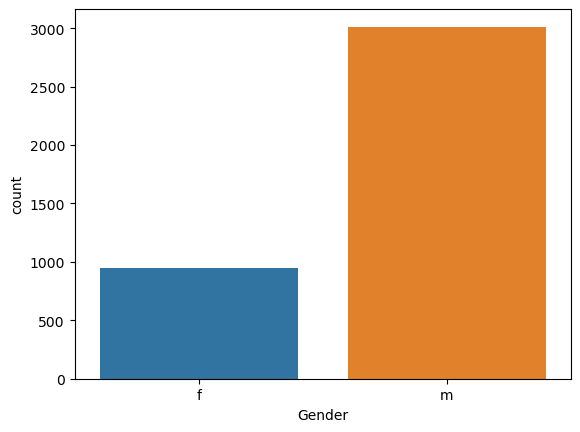

In [79]:
sns.countplot(df.Gender)

Males are more compared to females

<AxesSubplot:ylabel='Frequency'>

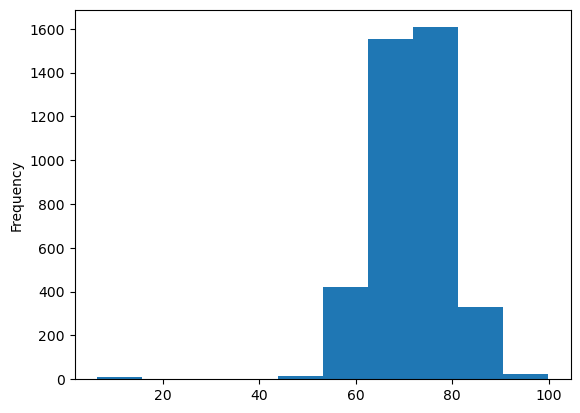

In [80]:
df['collegeGPA'].plot(kind='hist')

In [83]:
df['Specialization'].describe()

count                                          3962
unique                                           46
top       electronics and communication engineering
freq                                            875
Name: Specialization, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'computer engineering'),
  Text(1, 0, 'electronics and communication engineering'),
  Text(2, 0, 'information technology'),
  Text(3, 0, 'computer science & engineering'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'electronics and electrical engineering'),
  Text(6, 0, 'electronics & telecommunications'),
  Text(7, 0, 'instrumentation and control engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'electronics and computer engineering'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'applied electronics and instrumentation'),
  Text(12, 0, 'electronics & instrumentation eng'),
  Text(13, 0, 'information science engineering'),
  Text(14, 0, 'civil engineering'),
  Text(15, 0, 'mechanical and automation'),
  Text(16, 0, 'industrial & p

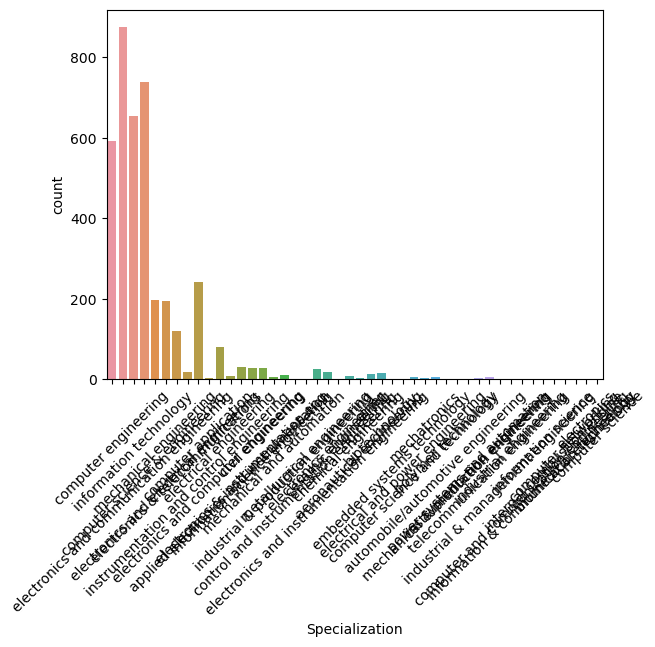

In [101]:
job_role=df['Specialization'].value_counts()[:10].reset_index()
sns.countplot(df.Specialization)
plt.xticks(rotation=45)

In [82]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

Many Branch names repeated here

In [102]:
def change_branch_names(branch):
    if branch in ['computer science','computer science and technology', 'computer and communication engineering',
                  'computer science & engineering','computer engineering','computer networking']:
        return "Computer Science Engineering"
    elif branch in ['electronics','electronics engineering','electronics and communication engineering',
                    'electronics and computer engineering']:
        return "Electronics & Communication Engineering"
    elif branch in ['electronics & instrumentation eng','electronics & instrumentation eng','instrumentation engineering',
                    'control and instrumentation engineering','electronics and instrumentation engineering',
                    'instrumentation and control engineering','applied electronics and instrumentation']:
        return "Electronics & Instrumentation Engineering"
    elif branch in ['electronics & telecommunications','telecommunication engineering',]:
        return "Electronics & Telecommunication Engineering"
    elif branch in ['information & communication technology', 'information science','information technology',
                    'information science engineering']:
        return "Information Technology/Science"
    elif branch in ['electronics and electrical engineering','electrical and power engineering']:
        return "Electrical Engineering"
    elif branch in ['industrial & management engineering', 'industrial engineering']:
        return "Industrial Engineering"
    elif branch in ['internal combustion engine','mechanical & production engineering','mechanical and automation','mechatronics']:
        return "Mechanical Engineering"
    else:
        return branch
    
df['Specialization']=df['Specialization'].apply(change_branch_names)

In [103]:
df['Specialization'].unique()

array(['Computer Science Engineering',
       'Electronics & Communication Engineering',
       'Information Technology/Science', 'mechanical engineering',
       'Electrical Engineering',
       'Electronics & Telecommunication Engineering',
       'Electronics & Instrumentation Engineering',
       'computer application', 'electrical engineering',
       'civil engineering', 'Mechanical Engineering',
       'industrial & production engineering', 'metallurgical engineering',
       'ceramic engineering', 'chemical engineering',
       'aeronautical engineering', 'other', 'biotechnology',
       'embedded systems technology', 'automobile/automotive engineering',
       'polymer technology', 'power systems and automation',
       'Industrial Engineering', 'biomedical engineering'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Specialization'>

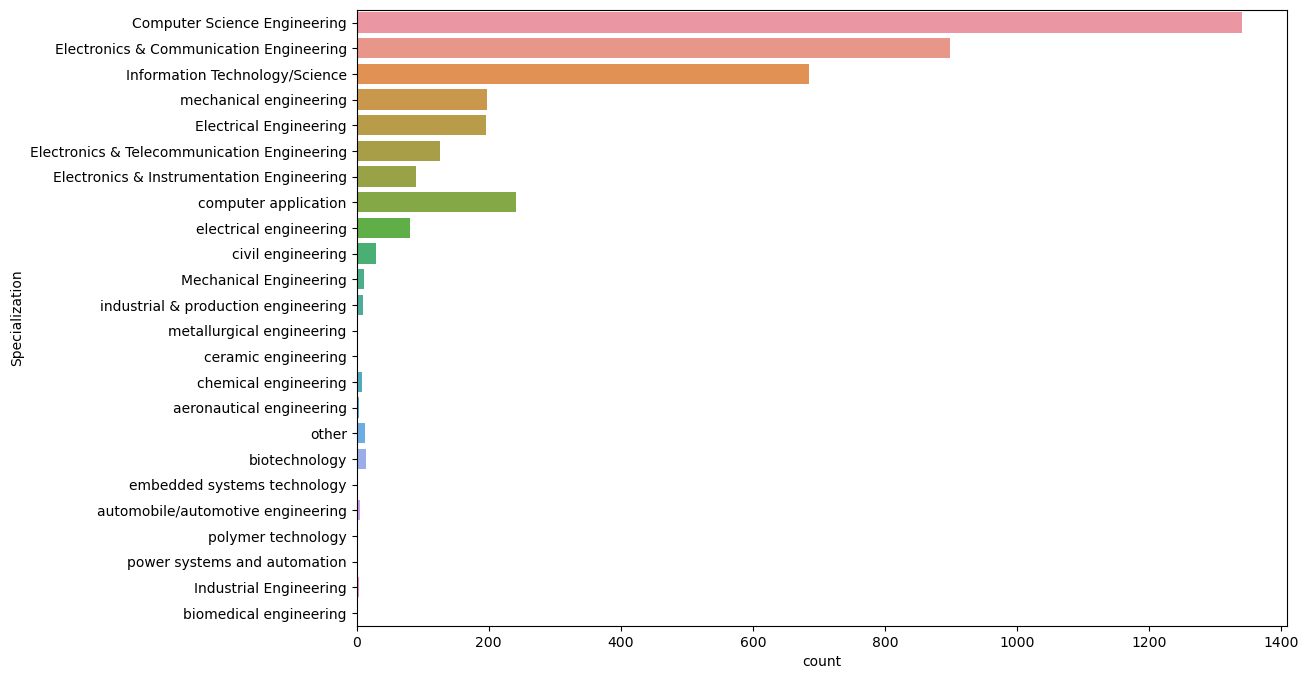

In [104]:
plt.figure(figsize=(12,8))
sns.countplot(y=df['Specialization'])

In [84]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'get', 'system engineer', 'java software engineer',
       'mechanical engineer', 'electrical engineer', 'project engineer',
       'senior php developer', 'senior systems engineer',
       'quality assurance engineer', 'qa analyst', 'network engineer',
       'product development engineer', 'associate software developer',
       'data entry operator', 'software engineer', 'developer',
       'electrical project engineer', 'programmer analyst',
       'systems analyst', 'senior software engineer', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [85]:
df['Designation'].replace({"ase":"associate software engineer", "get":"graduate engineer trainee",
                           "graduate trainee engineer":"graduate engineer trainee", "software engineer associate":"associate software engineer",
                           "business development managerde":"business development manager",
                           "jr. software developer":"junior software developer", "software trainee engineer":"software engineer trainee",
                           "asst. manager":"assistant manager", "dotnet developer":".net developer",
                           "qa analyst":"quality assurance analyst","associate software engg":"associate software engineer",
                           "assistant system engineer - trainee":"assistant system engineer trainee",
                           "software eng":"software engineer", "software engineering associate":"software engineer associate",
                           "software enginner":"software engineer", "systems engineer":"system engineer"}, inplace=True)


In [86]:
df['Designation'].nunique()

402

In [87]:
df['Designation']=df['Designation'].str.title()
df['Designation']

ID
203097         Senior Quality Engineer
579905               Assistant Manager
810601                 System Engineer
343523       Graduate Engineer Trainee
1027655                System Engineer
                      ...             
47916                Software Engineer
752781                Technical Writer
355888     Associate Software Engineer
947111              Software Developer
324966         Senior Systems Engineer
Name: Designation, Length: 3962, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'System Engineer'),
  Text(2, 0, 'Software Developer'),
  Text(3, 0, 'Programmer Analyst'),
  Text(4, 0, 'Java Software Engineer'),
  Text(5, 0, 'Software Test Engineer'),
  Text(6, 0, 'Project Engineer'),
  Text(7, 0, 'Technical Support Engineer'),
  Text(8, 0, 'Senior Software Engineer'),
  Text(9, 0, 'Java Developer'),
  Text(10, 0, 'Test Engineer'),
  Text(11, 0, 'Assistant Manager'),
  Text(12, 0, 'Web Developer'),
  Text(13, 0, 'Associate Software Engineer'),
  Text(14, 0, 'Network Engineer'),
  Text(15, 0, 'Application Developer'),
  Text(16, 0, 'Data Analyst'),
  Text(17, 0, 'Business Analyst')])

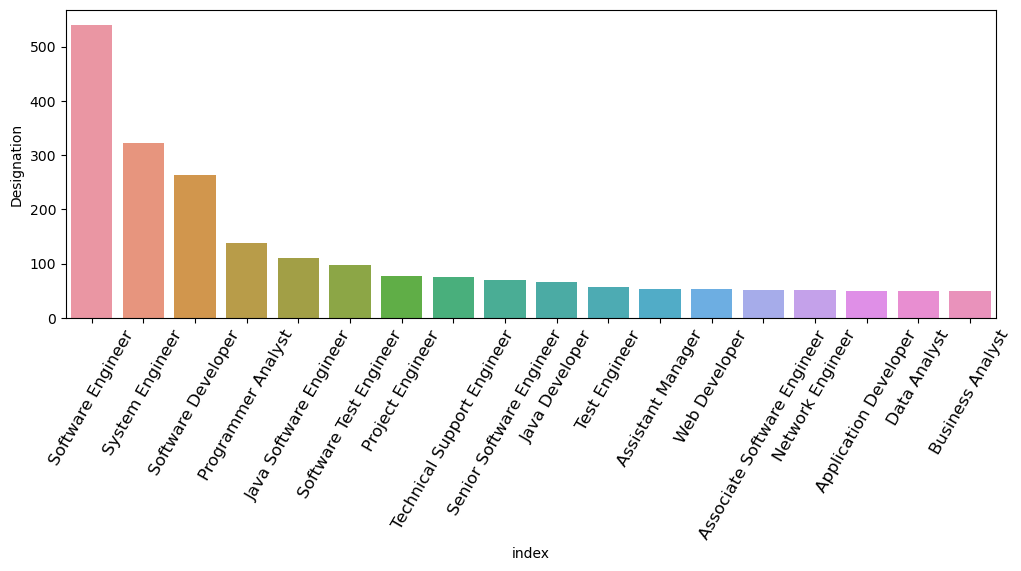

In [89]:
job_role=df['Designation'].value_counts()[:18].reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='index', y='Designation', data=job_role)
plt.xticks(rotation=60, fontsize=12)

In [90]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Manesar', 'Hyderabad',
       'Banglore', 'Noida', 'Kolkata', 'Pune', 'Gurgaon', '-1', 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'kolkata', 'Gandhi Nagar', 'Una', 'Daman and Diu', 'chennai',
       'GURGOAN', 'vsakhapttnam', 'pune', 'Nagpur', 'Bhagalpur',
       'new delhi - jaisalmer', 'Coimbatore', 'Ahmedabad', 'Kochi/Cochin',
       'Bankura', 'Bengaluru', 'Mysore ', 'Kanpur ', 'jaipur', 'Gurgaon ',
       'bangalore', 'CHENNAI', 'Vijayawada', 'Kochi', 'Beawar', 'Alwar',
       'NOIDA', 'Greater noida', 'Siliguri ', 'raipur', 'gurgaon',
       'Bhopal', 'Faridabad', '

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, '-1'),
  Text(2, 0, 'Noida'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Pune'),
  Text(5, 0, 'Chennai'),
  Text(6, 0, 'Gurgaon'),
  Text(7, 0, 'New Delhi'),
  Text(8, 0, 'Mumbai'),
  Text(9, 0, 'Kolkata'),
  Text(10, 0, 'Jaipur'),
  Text(11, 0, 'Mysore'),
  Text(12, 0, 'Lucknow'),
  Text(13, 0, 'Navi Mumbai'),
  Text(14, 0, 'chennai'),
  Text(15, 0, 'Chandigarh'),
  Text(16, 0, 'pune'),
  Text(17, 0, 'Greater Noida'),
  Text(18, 0, 'Indore'),
  Text(19, 0, 'Bhubaneswar')])

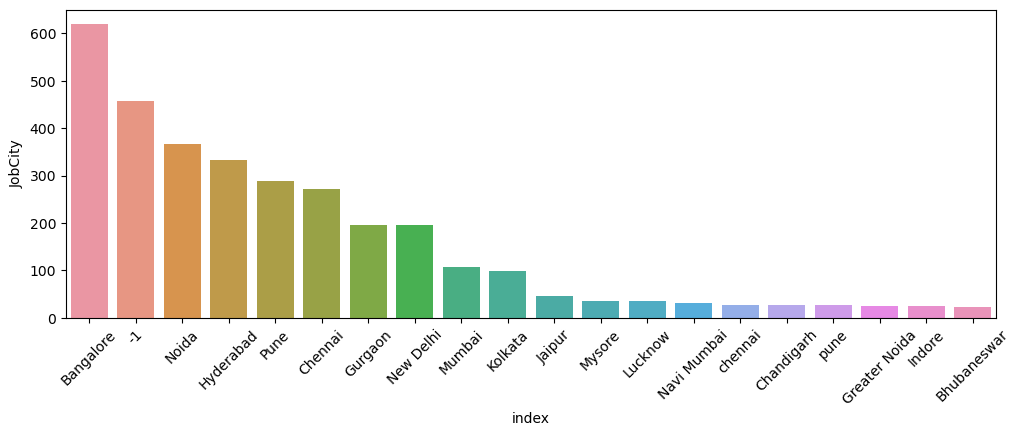

In [97]:
job_role=df['JobCity'].value_counts()[:20].reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='index', y='JobCity', data=job_role)
plt.xticks(rotation=45)


Most of the employees working in Bangalore

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013')])

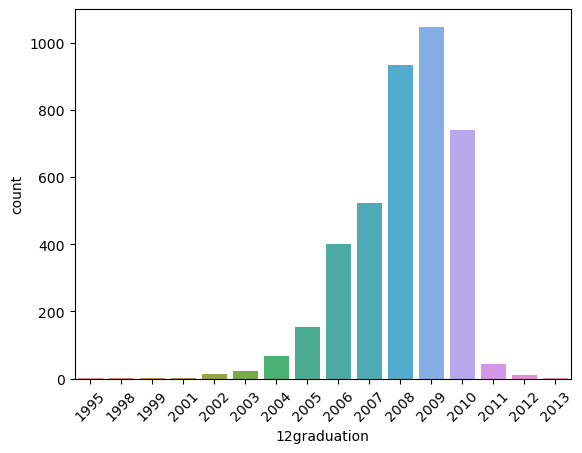

In [96]:

sns.countplot(df['12graduation'])
plt.xticks(rotation=45)


Most employees Graduate in 2009

# Bivarite Analysis

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

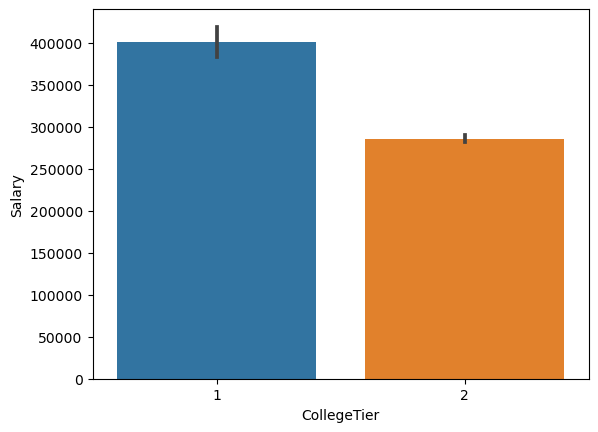

In [105]:
sns.barplot(x='CollegeTier',y='Salary',data=df)

College Tier 1 have highest salary

<AxesSubplot:xlabel='CollegeCityTier', ylabel='Salary'>

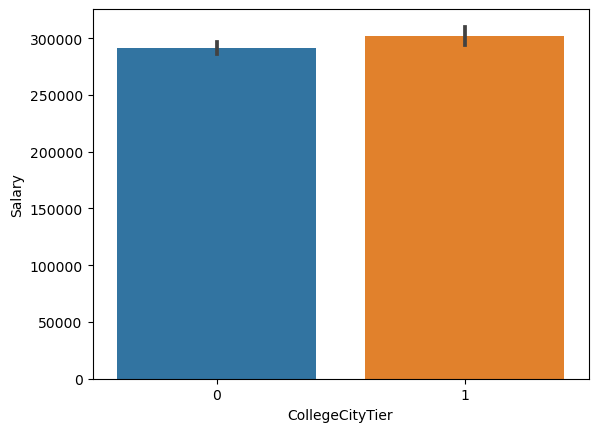

In [106]:
sns.barplot(x='CollegeCityTier',y='Salary',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

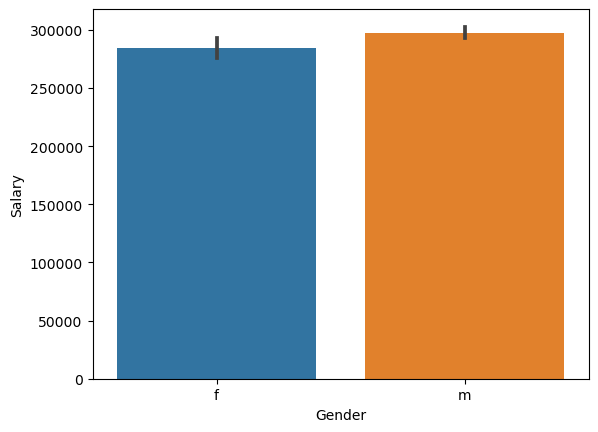

In [107]:
sns.barplot(x='Gender',y='Salary',data=df)

Males and famales both takes the same salary

In [109]:
df['Designation'].unique()

array(['Senior Quality Engineer', 'Assistant Manager', 'System Engineer',
       'Graduate Engineer Trainee', 'Java Software Engineer',
       'Mechanical Engineer', 'Electrical Engineer', 'Project Engineer',
       'Senior Php Developer', 'Senior Systems Engineer',
       'Quality Assurance Engineer', 'Quality Assurance Analyst',
       'Network Engineer', 'Product Development Engineer',
       'Associate Software Developer', 'Data Entry Operator',
       'Software Engineer', 'Developer', 'Electrical Project Engineer',
       'Programmer Analyst', 'Systems Analyst',
       'Senior Software Engineer', 'Associate Software Engineer',
       'Telecommunication Engineer', 'Application Developer',
       'Ios Developer', 'Executive Assistant', 'Online Marketing Manager',
       'Documentation Specialist', 'Management Trainee', 'Site Manager',
       'Software Developer', '.Net Developer', 'Production Engineer',
       'Jr. Software Engineer', 'Trainee Software Developer',
       'Ui Develop

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

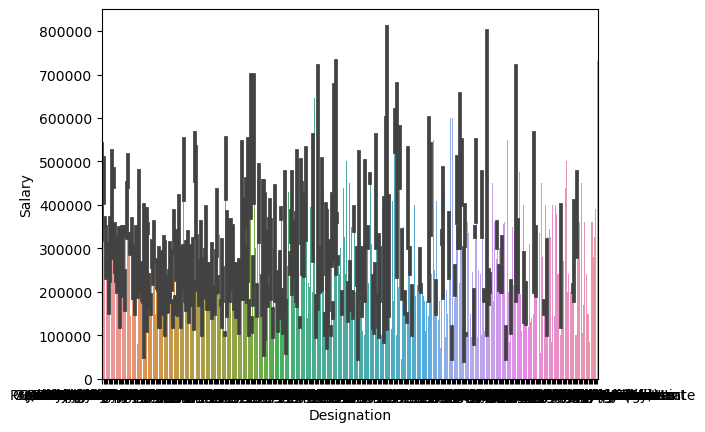

In [113]:
sns.barplot(x='Designation',y='Salary',data=df)

<AxesSubplot:xlabel='ComputerScience', ylabel='Salary'>

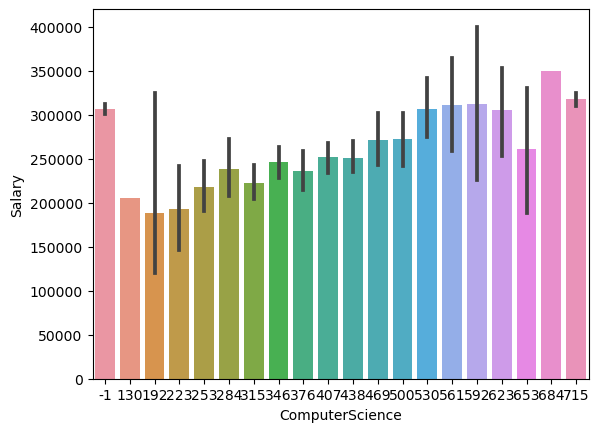

In [114]:
sns.barplot(x='ComputerScience',y='Salary',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'polymer technology'),
  Text(1, 0, 'industrial & production engineering'),
  Text(2, 0, 'civil engineering'),
  Text(3, 0, 'chemical engineering'),
  Text(4, 0, 'Industrial Engineering'),
  Text(5, 0, 'metallurgical engineering'),
  Text(6, 0, 'ceramic engineering'),
  Text(7, 0, 'Electronics & Instrumentation Engineering'),
  Text(8, 0, 'Computer Science Engineering'),
  Text(9, 0, 'Information Technology/Science'),
  Text(10, 0, 'mechanical engineering'),
  Text(11, 0, 'Electronics & Telecommunication Engineering'),
  Text(12, 0, 'biomedical engineering'),
  Text(13, 0, 'Electronics & Communication Engineering'),
  Text(14, 0, 'Mechanical Engineering')])

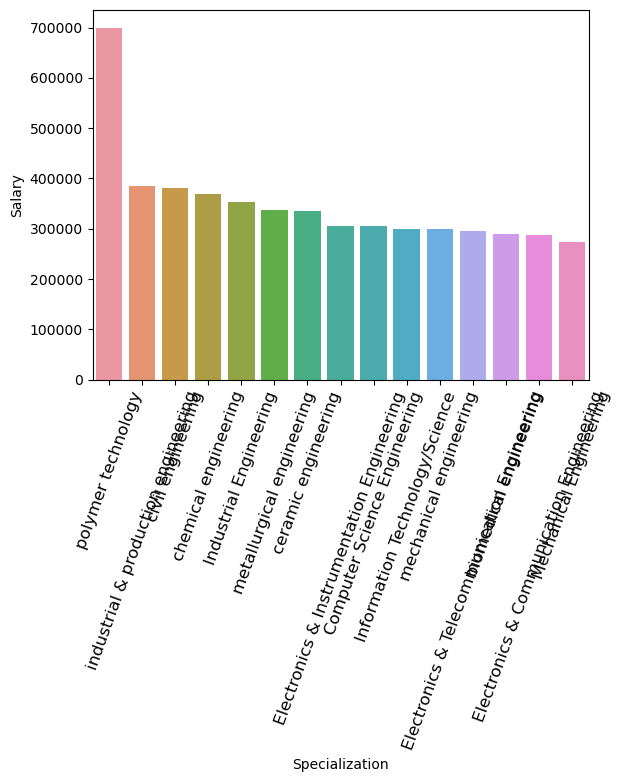

In [115]:
sns.barplot(x='Specialization', y='Salary', data=df, ci=None,
           order=df.groupby('Specialization').Salary.mean().sort_values(ascending=False).index[:15])
plt.xticks(fontsize=12, rotation=70)

# Research Questions

# Here the Claim is: “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”`

Step-1
Lets work on Computer Science Engineering

In [116]:
CS=df[df['Specialization']=='Computer Science Engineering']
CS.head()

Salary               DOJ               DOL              Designation  \
ID                                                                              
203097  420000.0  01-06-2012 00:00           present  Senior Quality Engineer   
947847  300000.0  01-08-2014 00:00  01-05-2015 00:00   Java Software Engineer   
87291   600000.0  01-04-2011 00:00  01-04-2015 00:00     Senior Php Developer   
711342  120000.0  01-01-2014 00:00  01-06-2014 00:00      Data Entry Operator   
466888  325000.0  01-09-2014 00:00           present        Software Engineer   

          JobCity Gender               DOB  10percentage  \
ID                                                         
203097  Bangalore      f  19-02-1990 00:00         84.30   
947847   Banglore      m  01-02-1993 00:00         86.08   
87291   Bangalore      m  24-06-1989 00:00         88.60   
711342    Gurgaon      m  07-12-1992 00:00         65.00   
466888       Pune      f  30-11-1990 00:00         79.00   

                               10board  12graduation  ...  ComputerScience  \
ID                                                    ...                    
203097  board ofsecondary education,ap          2007  ...               -1   
947847                     state board          2010  ...              346   
87291                  mp board bhopal          2006  ...               -1   
711342                     state board          2008  ...               -1   
466888                            cbse          2008  ...               -1   

       MechanicalEngg  ElectricalEngg  TelecomEngg CivilEngg  \
ID                                                             
203097             -1              -1           -1        -1   
947847             -1              -1           -1        -1   
87291              -1              -1           -1        -1   
711342             -1              -1           -1        -1   
466888             -1              -1           -1        -1   

       conscientiousness  agreeableness  extraversion  nueroticism  \
ID                                                                   
203097            0.9737         0.8128        0.5269       1.3549   
947847            1.7081        -0.1054       -1.0379      -2.0092   
87291             0.0464         0.8128        0.0914       0.1798   
711342           -0.1590         0.3789        1.3933      -0.2344   
466888            0.8192         0.2668       -0.2714      -0.4078   

       openess_to_experience  
ID                            
203097               -0.4455  
947847               -1.0872  
87291                 0.0284  
711342                1.4386  
466888               -0.1295  

[5 rows x 37 columns]

In [117]:
CS.shape[0]

1341

# Step 2
computer science engineering graduates working in programming analyst, software engineer, hardware engineer and associate engineer

In [118]:
abc=CS[(CS['Designation']=='Program Analyst Trainee') | 
           (CS['Designation']=='Programmer Analyst Trainee') |
           (CS['Designation']=='Software Engineer') | 
           (CS['Designation']=='Hardware Engineer and Associate Engineer') |
           (CS['Designation']=='Associate Software Engineer') |
           (CS['Designation']=='Software Programmer') |
           (CS['Designation']=='Software Engineer Trainee') |
           (CS['Designation']=='Software Trainee') |
           (CS['Designation']=='Associate Software Engineer')]


# Step 3

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

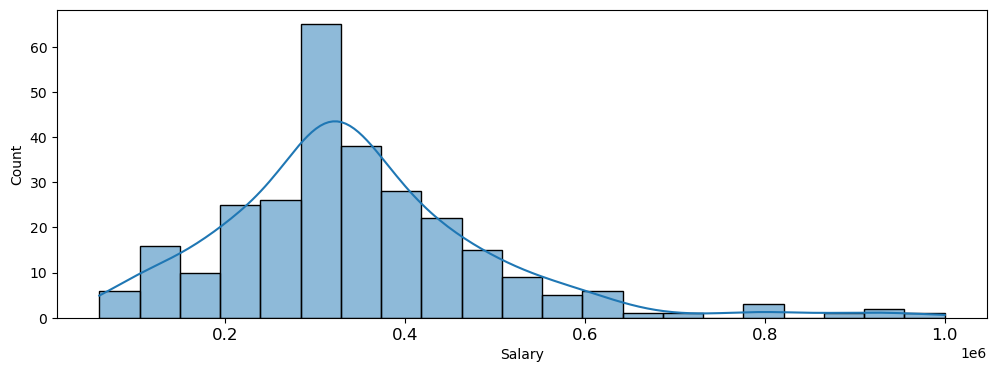

In [120]:
plt.figure(figsize=(12,4))
sns.histplot(x=abc['Salary'], kde=True)
plt.xticks(fontsize=12)

In [121]:
abc['Salary'].mean()

344303.5714285714

In [122]:
abc['Salary'].median()

325000.0

# Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [123]:
specialization_by_gender=pd.crosstab(index=df['Gender'], columns=df['Specialization']).T
specialization_by_gender.reset_index(inplace=True)
specialization_by_gender.columns=['Specialization', 'Female','Male']
specialization_by_gender

Specialization  Female  Male
0                  Computer Science Engineering     357   984
1                        Electrical Engineering      34   162
2       Electronics & Communication Engineering     214   684
3     Electronics & Instrumentation Engineering      26    64
4   Electronics & Telecommunication Engineering      29    98
5                        Industrial Engineering       1     2
6                Information Technology/Science     183   502
7                        Mechanical Engineering       1    10
8                      aeronautical engineering       1     2
9             automobile/automotive engineering       0     5
10                       biomedical engineering       2     0
11                                biotechnology       9     6
12                          ceramic engineering       0     1
13                         chemical engineering       1     8
14                            civil engineering       6    23
15                         computer application      58   183
16                       electrical engineering      16    65
17                  embedded systems technology       0     1
18          industrial & production engineering       2     8
19                       mechanical engineering      10   187
20                    metallurgical engineering       0     2
21                                        other       0    13
22                           polymer technology       0     1
23                 power systems and automation       0     1

In [137]:
fig=px.pie(names='Specialization', values='Male', data_frame=specialization_by_gender,
          title='Most common Specialization in Male')
fig.show()


In [138]:
fig=px.pie(names='Specialization', values='Female', data_frame=specialization_by_gender,
          title='Most common Specialization in Female')
fig.show()


Both male and female have same interest, specialization is independent of gender